<a href="https://colab.research.google.com/github/Dibyas83/ML/blob/main/MLPclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning Process
loading data
preprocessing
training a model
evaluting the mode
making predictions

Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from ipywidgets import interactive

In [ ]:
# x,y = make_circles(n_samples = 300, noise = 0.1, factor = 0.5, random_state = 0)

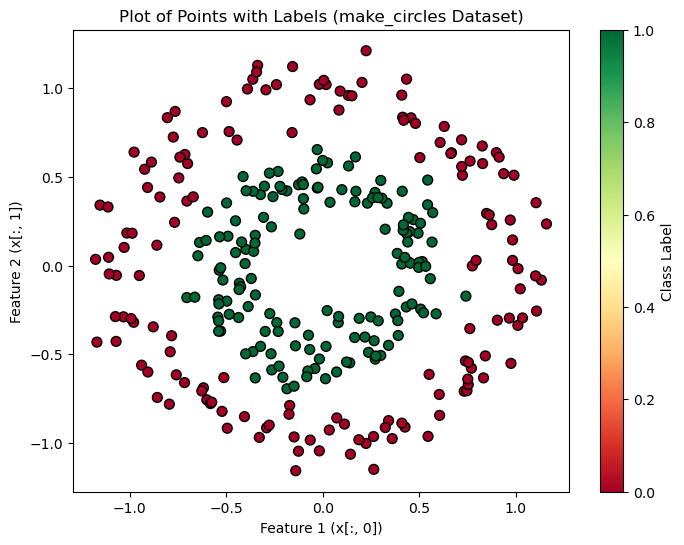

In [ ]:
#plot the points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.RdYlGn, edgecolors = 'k', marker = 'o', s =50)
plt.xlabel('Feature 1 (x[:, 0])')
plt.ylabel('Feature 2 (x[:, 1])')
plt.title('Plot of Points with Labels (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

In [ ]:
# function to update and display the plot
def update_plot(hidden_layer_size):
    #create a mlp classifier,no of neuron  = hidden layer size,relu for non lnear boundaries,willbe trained upto maxiter,randstate will help ini
    clf = MLPClassifier(hidden_layer_sizes = (hidden_layer_size,),
                     activation = 'relu', max_iter = 3000, random_state = 1)
    #we train our classifier using the datapoints and labels .Once the classifier is trained, we can use it to predict labels for new data points
    #fit the classifier to data
    clf.fit(x,y)

    #we need a new set of data points that cover the range of data set we use for training.
    #create a grid of points for visualization,these are id arrays of 100 values ech,representing the x,y coordinates of the grid.
    x_vals = np.linspace(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1, 100)

    #the resulting s,y plane are both 100*100 arrays,representing a grid of 10000 points
    x_plane,y_plane = np.meshgrid(x_vals,y_vals)

    #grid_points is asingle 2d array (grid_points) of shape(10000, 2),where each row represents a point in the grid.
    grid_points = np.column_stack((x_plane.ravel(), y_plane.ravel()))

    #Next, we reshape these x and y-coordinates in the shape of 100 by 100 grid. Next,
    #we combine these grids to get our new data points, which we will use for predicting labels.
    #The predicted labels are reshaped so that these can be used for plotting the decision boundary.
    #We also predict labels for training data points so that we can show these on the plot, along
    #with the decision boundary.predict class labels for the grid points(for decision boundary)
    z = clf.predict(grid_points)

    # z.reshape(x_plane.shape) reshapes z into 100*100 array
    z=z.reshape(x_plane.shape)
    # predict class labels for the original data pints
    y_pred = clf.predict(x)

    #clear previous plot
    plt.clf()

    #to visualize decission boundary of a model by plotting the predicted class probabilities
    plt.contourf(x_plane, y_plane, z, levels = [-0.5, 0.5, 1.5], cmap = plt.cm.RdYlGn, alpha = 0.6)

    #plot the original data points with their predicted labels,sep points for each predicted class
    class_0 = y_pred == 0 # indices of points predicted as class 0
    class_1 = y_pred == 1 # indices of points predicted as class 1

    plt.scatter(x[class_0,0], x[class_0, 1], c = 'red',edgecolors = 'k', marker= 'o', s=50, label = 'Predicted Class 0')
    plt.scatter(x[class_1,0], x[class_1, 1], c = 'green',edgecolors = 'k', marker= 'o', s=50, label = 'Predicted Class 1')

    #add labels and title
    plt.xlabel('Feature 1')
    plt.xlabel('Feature 1')
    plt.title(f'Decision Boundary and Predicted labels (Hidden Layer Size = (hidden_layer_size))')
    plt.legend()
    plt.show()

#create a slider for hiddenlayer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max = 10,step=1, description='Hidden Layer Size')

#create an interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size= hidden_layer_size_slider)

#display the widgets
display(interactive_plot)



interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…